# Avocado Analysis


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


target feature is 'region'

In [4]:
df.columns.tolist()

['Unnamed: 0',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [5]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [6]:
df.duplicated().sum()

0

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df.Date,format = '%Y-%m-%d')

In [9]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [11]:
print(df['Date'].min())
print(df['Date'].max())

2015-01-04 00:00:00
2018-03-25 00:00:00


In [12]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [13]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

1.we have four year of data.
2.and dataset is diveded into 2 types ,'Organic' and 'Conventional'. 

In [14]:
# checkingnthe value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
352

In [15]:
mis = df[df['region']=='WestTexNewMexico']
mis

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2756,0,2015-12-27,0.71,776404.39,451904.51,141599.36,15486.97,167413.55,123158.22,33065.33,11190.00,conventional,2015,WestTexNewMexico
2757,1,2015-12-20,0.83,649885.76,389110.55,108176.29,12953.59,139645.33,90392.86,23535.80,25716.67,conventional,2015,WestTexNewMexico
2758,2,2015-12-13,0.78,646041.56,437780.91,100110.13,13576.25,94574.27,83053.10,10947.84,573.33,conventional,2015,WestTexNewMexico
2759,3,2015-12-06,0.74,623231.77,398871.12,133434.18,21088.12,69838.35,68233.56,1604.79,0.00,conventional,2015,WestTexNewMexico
2760,4,2015-11-29,0.81,519028.45,335446.83,103635.94,11463.06,68482.62,67264.73,1217.89,0.00,conventional,2015,WestTexNewMexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.00,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.00,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.00,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.00,organic,2018,WestTexNewMexico


In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

1.The feature 'Unnamed: 0 ' is just a representation of indexes,so we dropped it.
2.now check if it is removed or not.

In [17]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [24]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


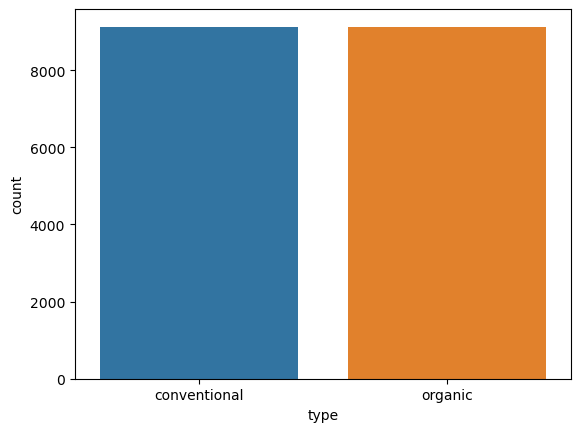

In [20]:
sns.countplot(x='type',data=df)
plt.show()

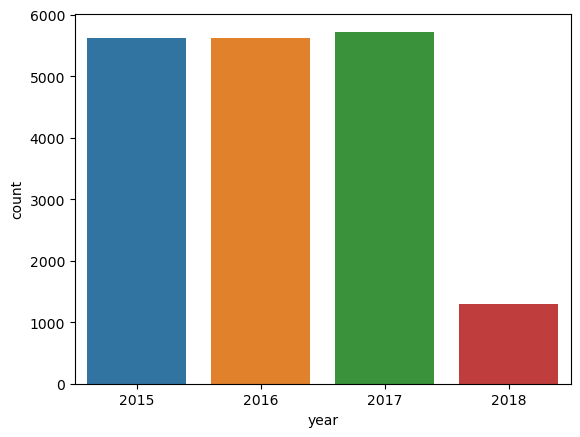

In [21]:
sns.countplot(x='year',data=df)
plt.show()

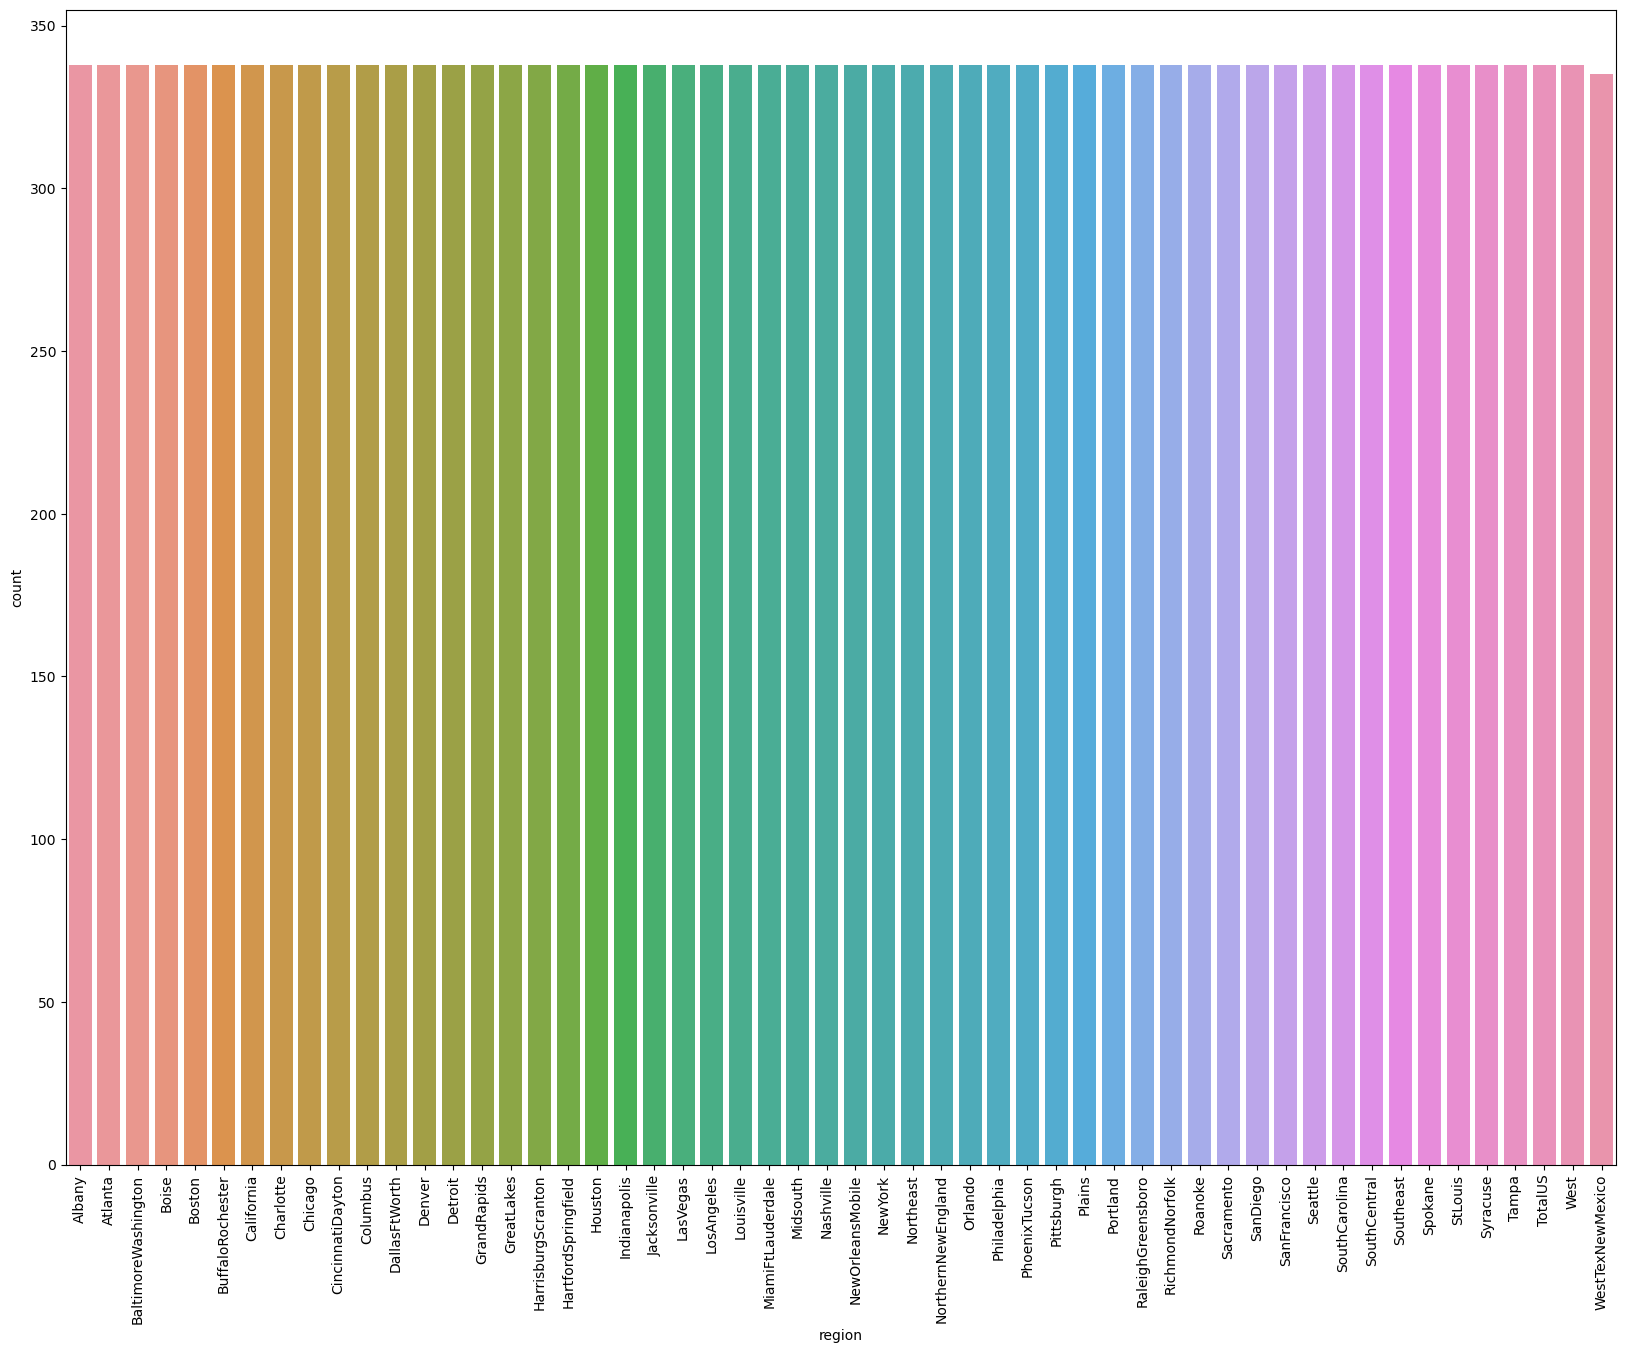

In [22]:
plt.figure(figsize=(20,15))
sns.countplot(x='region',data=df)
plt.xticks(rotation=90)
plt.show()

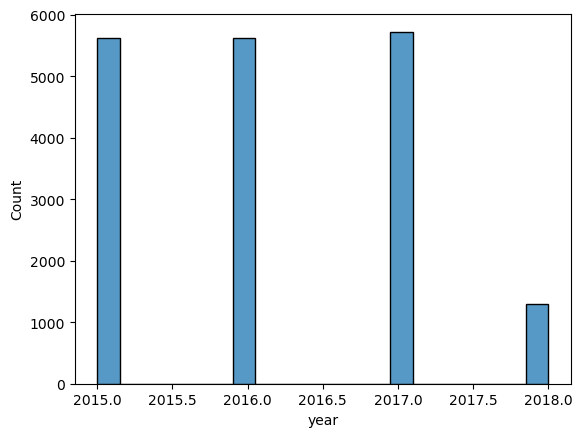

In [23]:
sns.histplot(df['year'],kde=False)
plt.show()

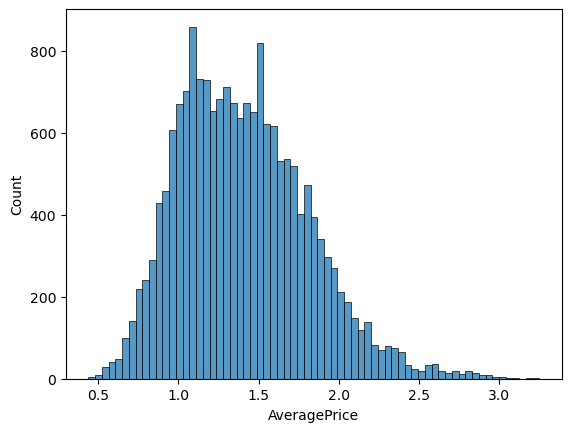

In [24]:
sns.histplot(df['AveragePrice'],kde=False)
plt.show()

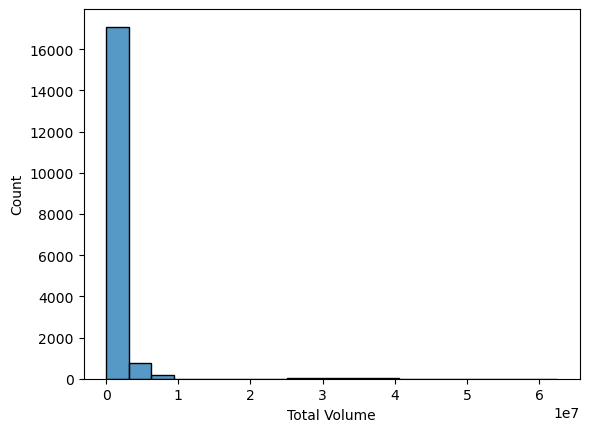

In [30]:
sns.histplot(df['Total Volume'],bins=20,kde=False)
plt.show()

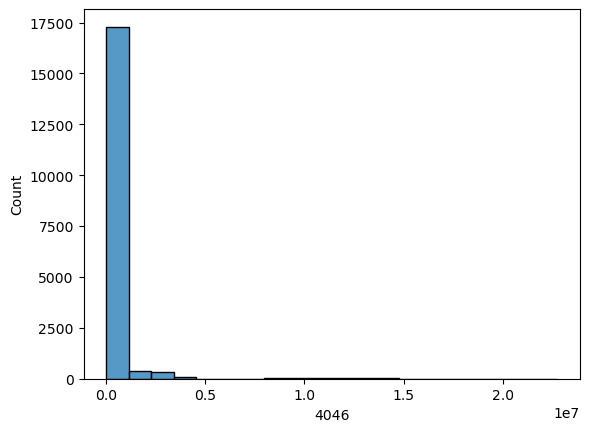

In [25]:
sns.histplot(df['4046'],bins = 20,kde=False)
plt.show()

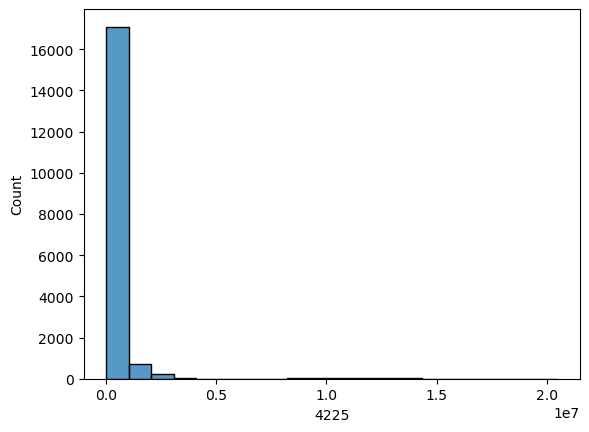

In [26]:
sns.histplot(df['4225'],bins = 20,kde=False)
plt.show()

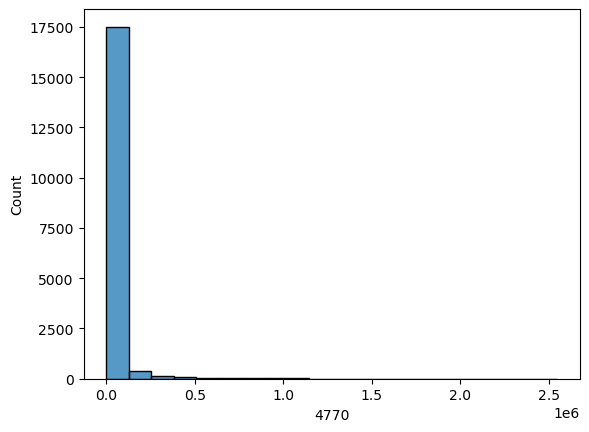

In [27]:
sns.histplot(df['4770'],bins = 20,kde=False)
plt.show()

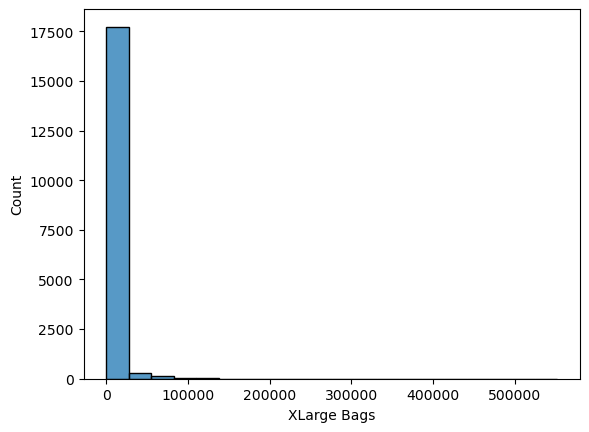

In [28]:
sns.histplot(df['XLarge Bags'],bins = 20,kde=False)
plt.show()

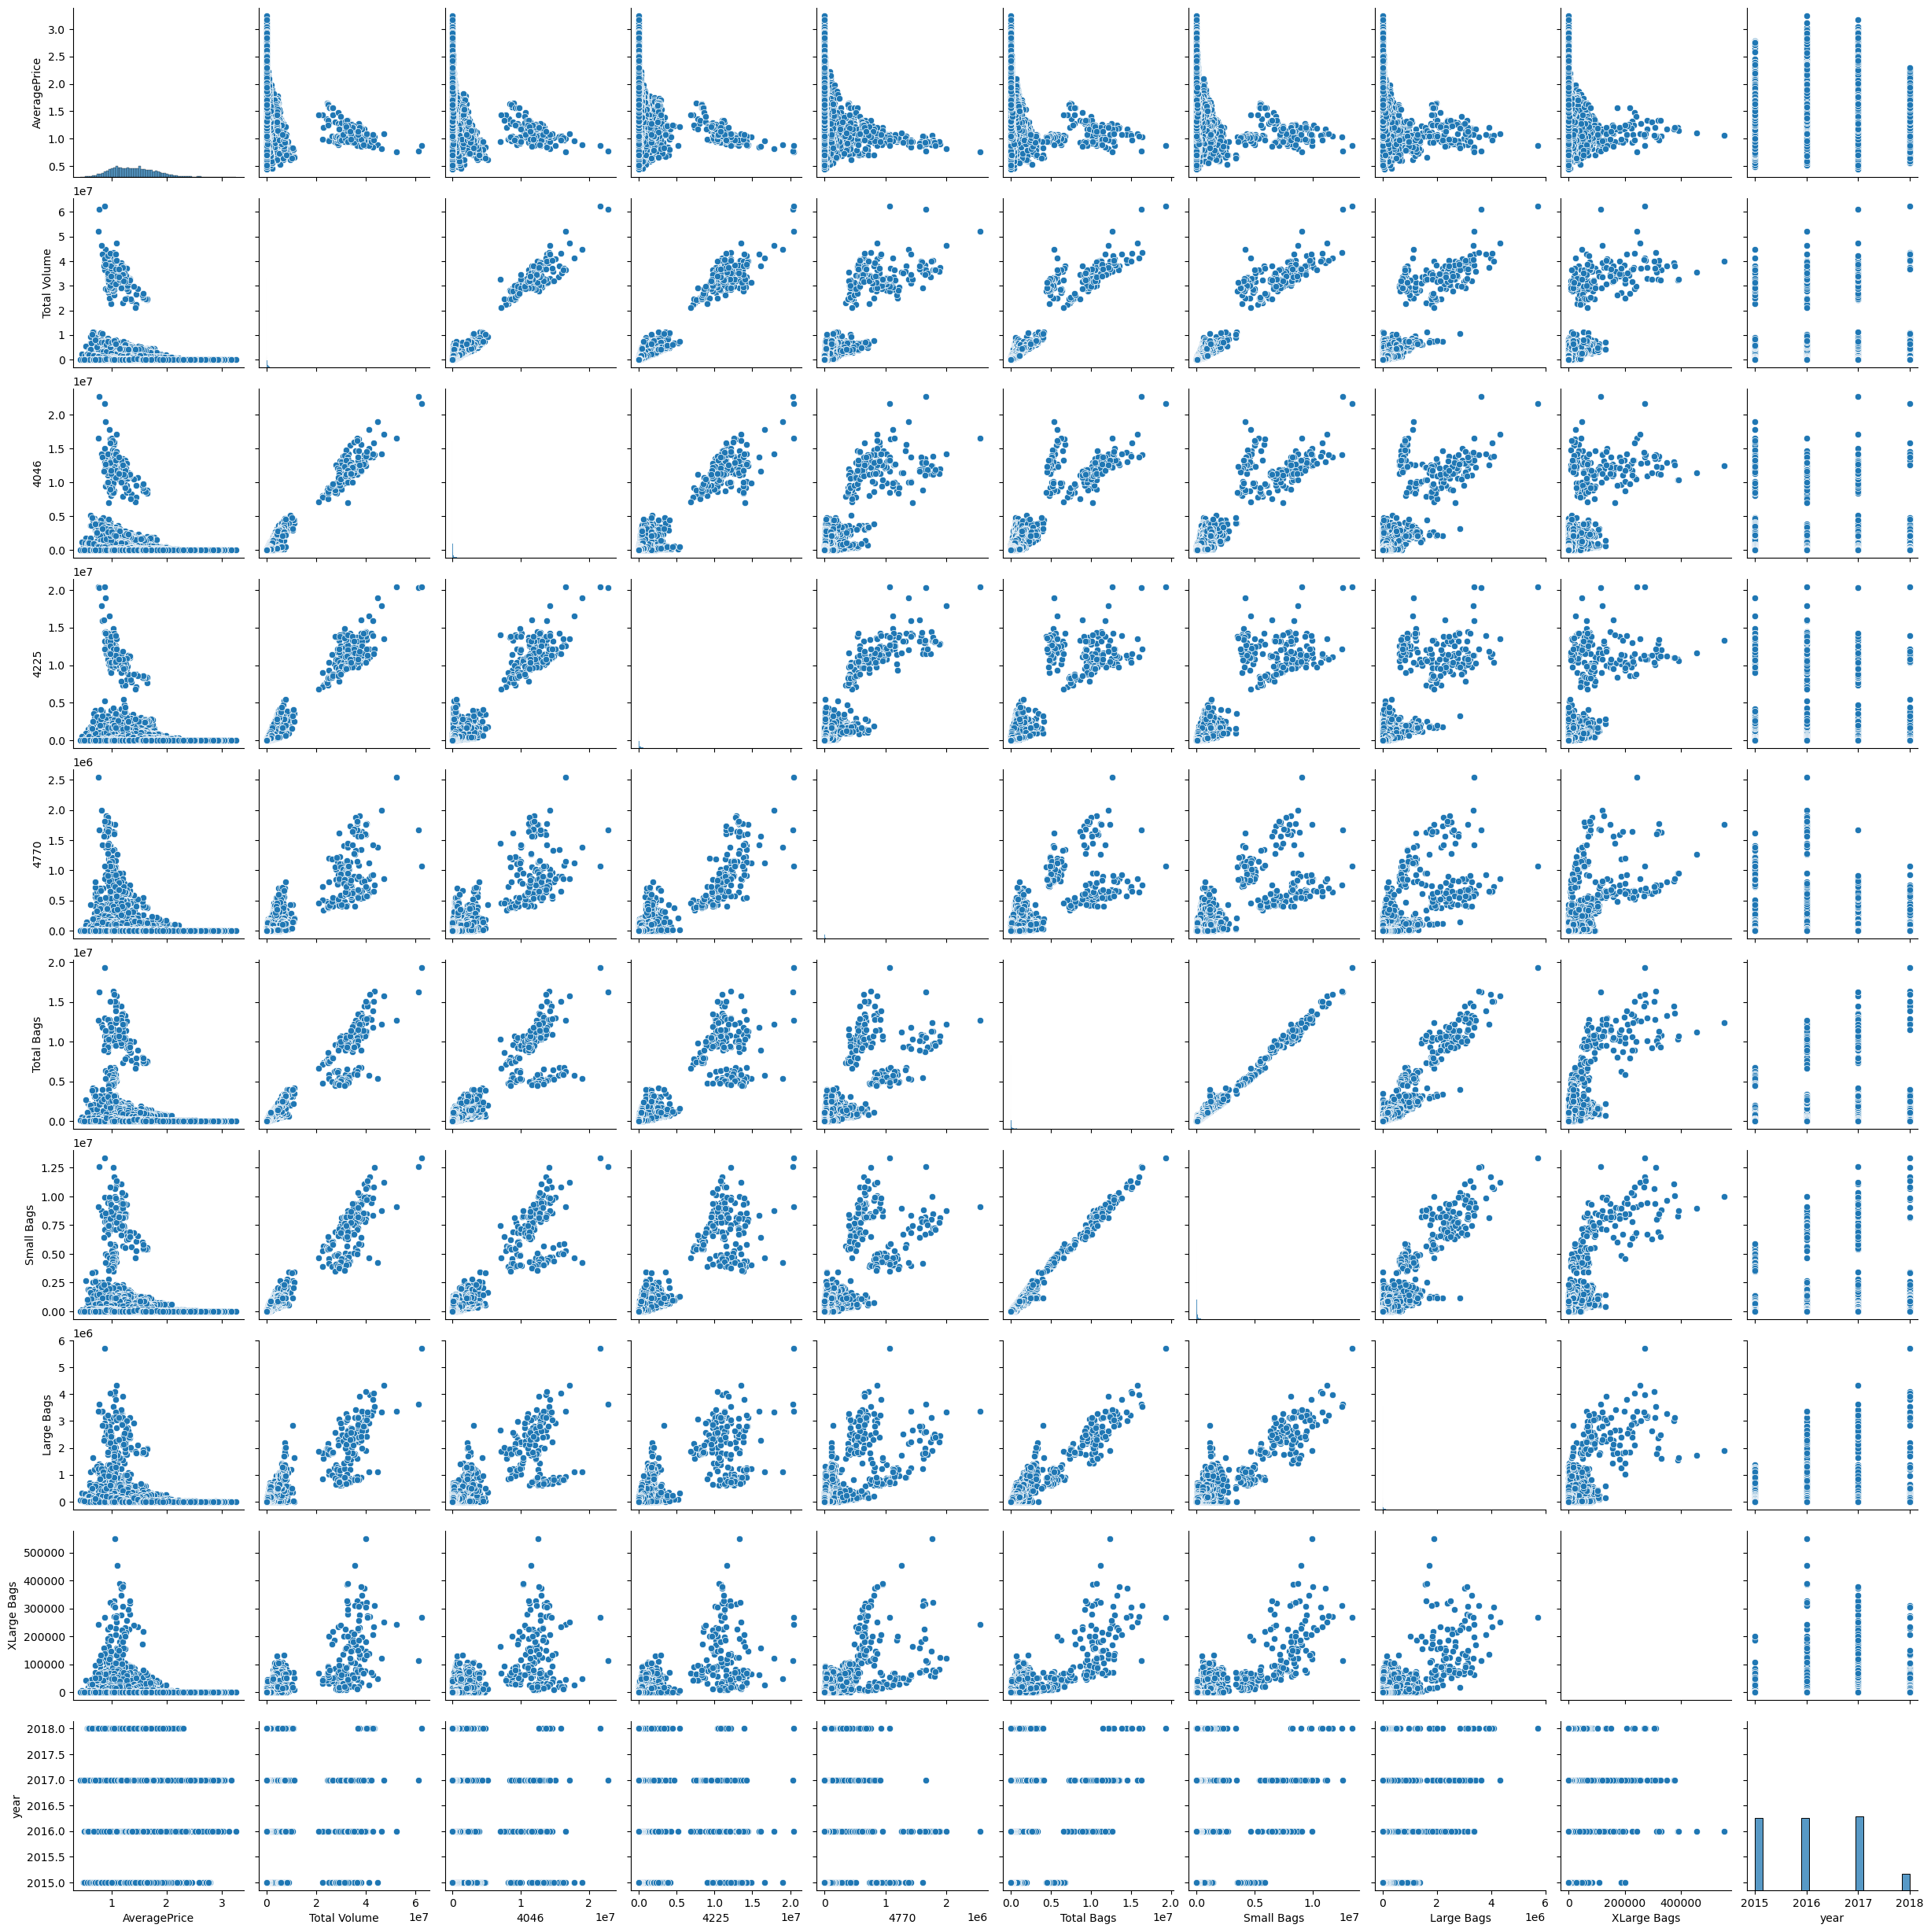

In [30]:
sns.pairplot(data=df,palette='Dark2')

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
# Encoding
lab = LabelEncoder()
lab.fit(df['region'])
df.region = lab.transform(df.region)

In [33]:
lab.fit(df['type'])
df.type = lab.transform(df.type)

In [34]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                     int32
year                     int64
region                   int32
dtype: object

In [35]:
df.drop('Date',axis=1,inplace=True)

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

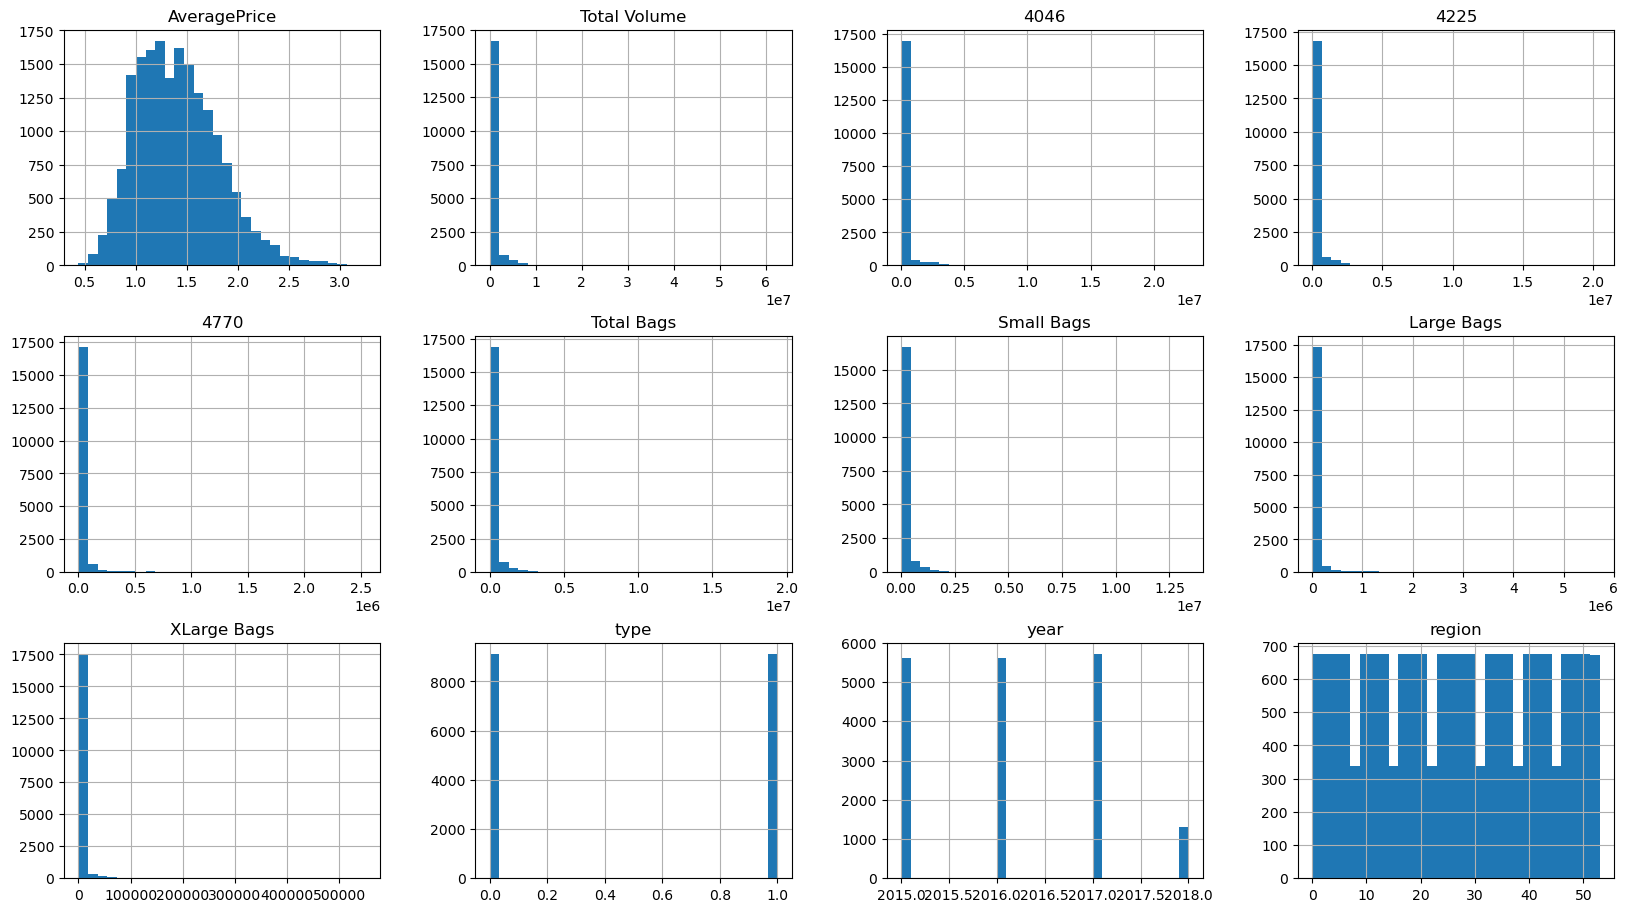

In [37]:
# plotting histogram for checking normal distribution
df.hist(figsize=(20,15),grid=True,layout=(4,4),bins=30)

region and average price column is normal distributed.
to make the column as normally distribute we should remove skewness of columns.

In [38]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [39]:
sk = ('Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags')
for col in sk:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [40]:
df.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
region          0.000030
dtype: float64

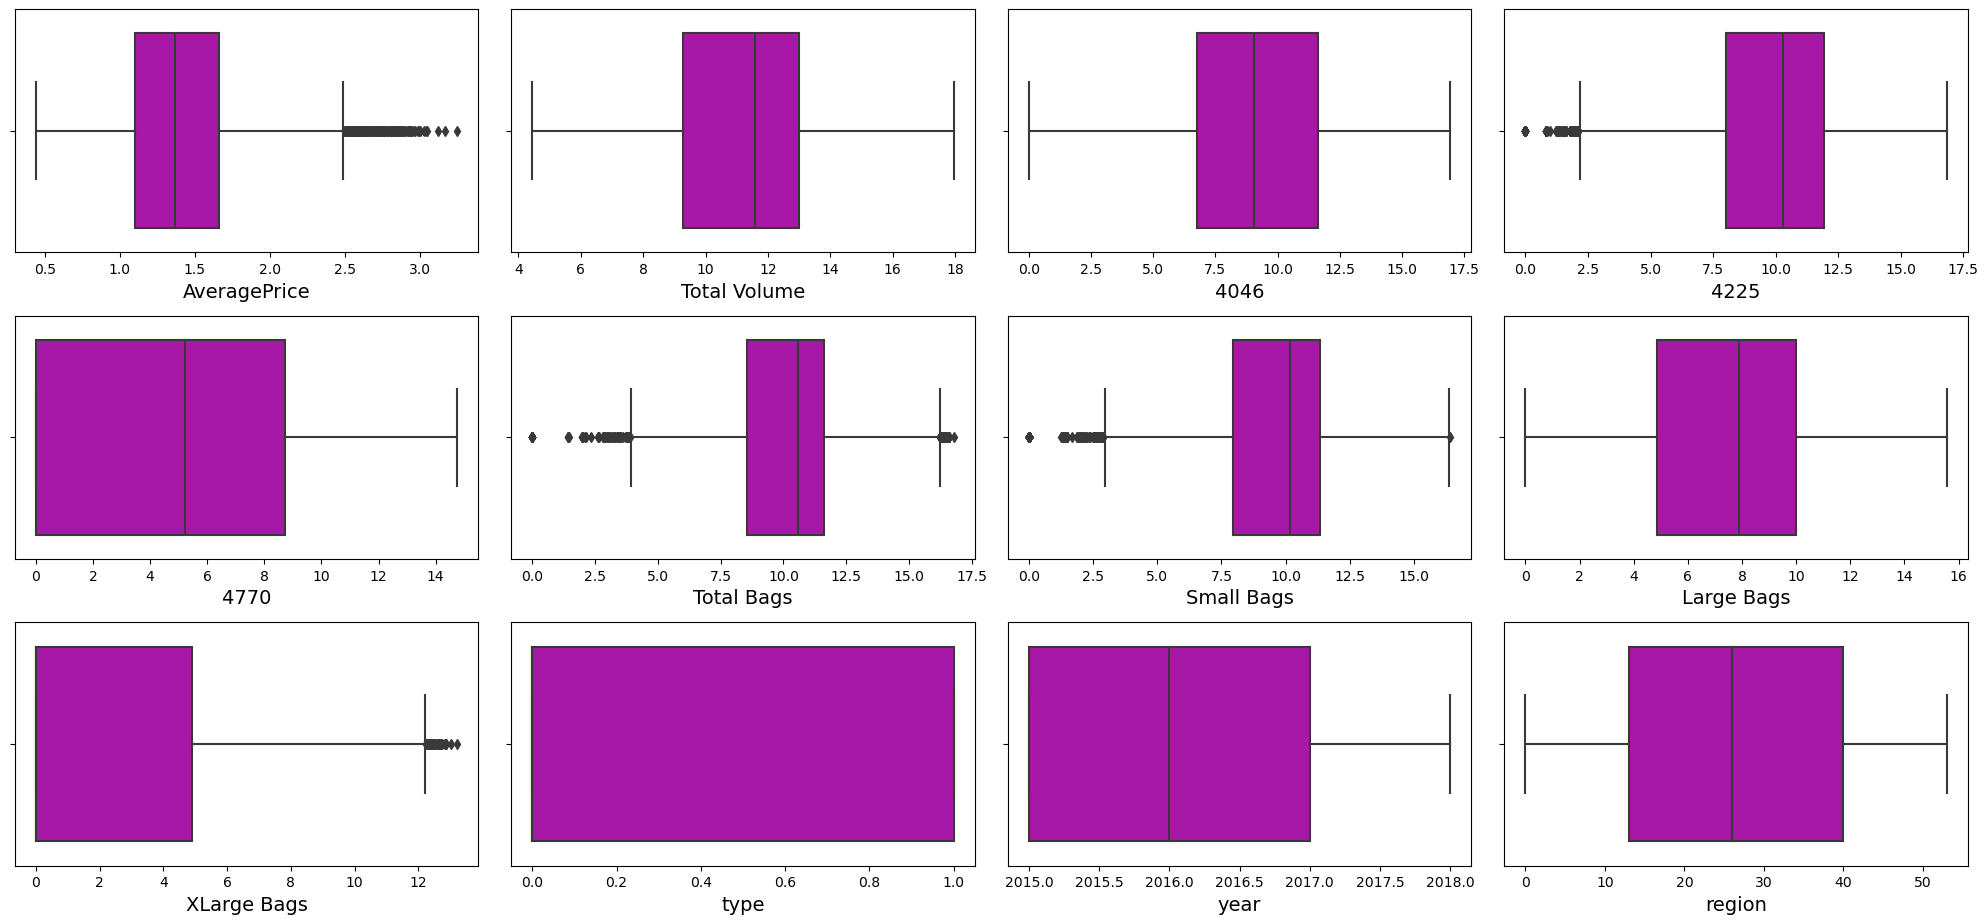

In [41]:
plt.figure(figsize=(20,15),facecolor = 'white')
plot = 1
for col in df.columns:
    if plot<=12:
        a = plt.subplot(5,4,plot)
        sns.boxplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation = 0,fontsize =10)
    plot+=1
plt.tight_layout()

In [42]:
# Remove Outliers
# calculate zscore
from scipy.stats import zscore

zs = np.abs(zscore(df))
zs

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.188689,0.107282,0.609752,0.374936,0.279143,0.494074,0.247796,0.669747,0.645526,0.999836,1.221282,1.700252
1,0.139020,0.175949,0.737707,0.305200,0.233838,0.454761,0.213093,0.658279,0.645526,0.999836,1.221282,1.700252
2,1.182069,0.158690,0.688840,0.618892,0.042078,0.523041,0.273995,0.643743,0.645526,0.999836,1.221282,1.700252
3,0.809551,0.017121,0.583598,0.472808,0.181974,0.672335,0.409182,0.576571,0.645526,0.999836,1.221282,1.700252
4,0.312861,0.207558,0.638425,0.298852,0.171717,0.644845,0.388616,0.475393,0.645526,0.999836,1.221282,1.700252
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.685006,0.407310,0.878279,1.217613,0.299689,0.085548,0.272479,0.645526,1.000164,1.970504,1.700811
18245,0.755023,0.775077,0.568306,0.594835,1.217613,0.466102,0.232904,0.346517,0.645526,1.000164,1.970504,1.700811
18246,1.152375,0.778901,0.568251,0.712597,0.370548,0.459975,0.215422,0.872380,0.645526,1.000164,1.970504,1.700811
18247,1.301382,0.707798,0.494407,0.644192,0.370240,0.391424,0.155249,0.829787,0.645526,1.000164,1.970504,1.700811


In [45]:
threshold=3
print(np.where(zs<3))
print(df.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 12)


In [47]:
df_new = df[(zs<3).all(axis=1)]

In [48]:
print(df.shape)
print(df_new.shape)

(18249, 12)
(17834, 12)


In [49]:
df=df_new
print('after removing outliers:',df.shape)

after removing outliers: (17834, 12)


# Data Distribution

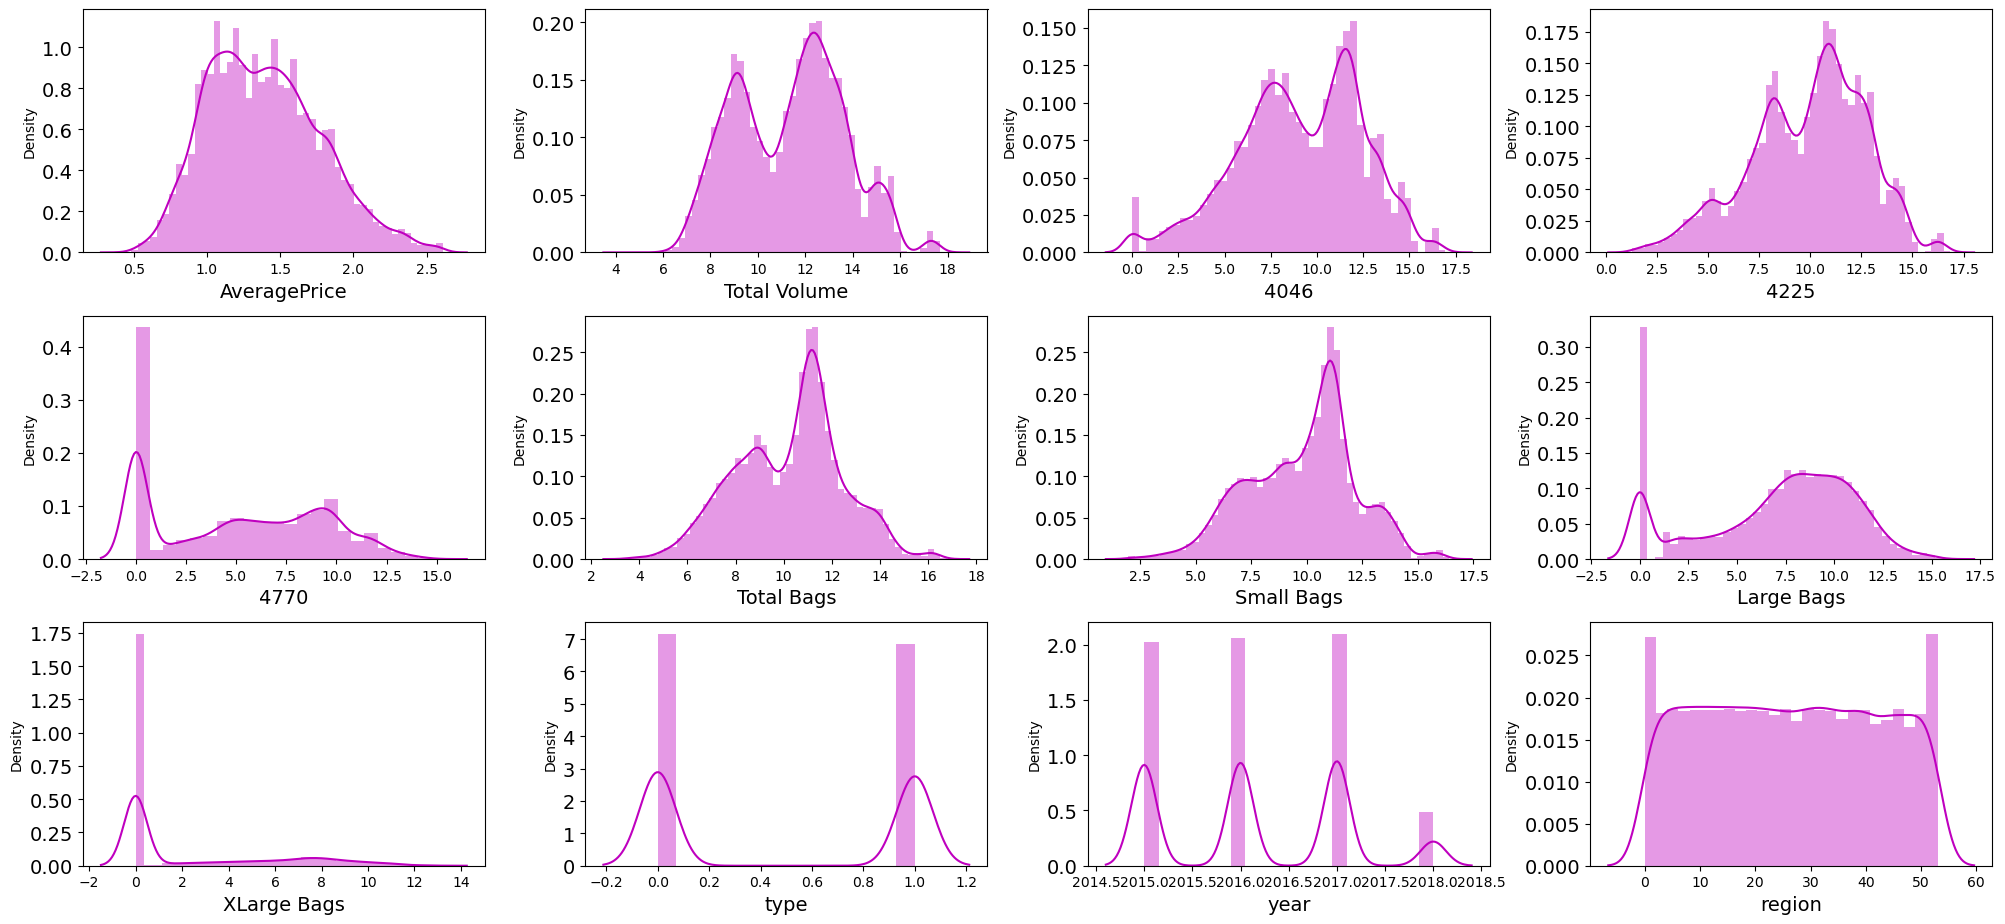

In [50]:
plt.figure(figsize=(20,15),facecolor = 'white')
plot = 1
for col in df.columns:
    if plot<=12:
        a = plt.subplot(5,4,plot)
        sns.distplot(df[col],color = 'm')
        plt.xlabel(col,fontsize=14)
        plt.yticks(rotation = 0,fontsize =14)
    plot+=1
plt.tight_layout()

In [51]:
cor = df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.586934,-0.551596,-0.459261,-0.507403,-0.574304,-0.497023,-0.485341,-0.380619,0.619118,0.096924,-0.030929
Total Volume,-0.586934,1.000000,0.886083,0.914408,0.831601,0.947245,0.912346,0.672093,0.659128,-0.793844,0.079282,0.123788
4046,-0.551596,0.886083,1.000000,0.764740,0.746330,0.800158,0.780186,0.584306,0.583520,-0.719482,0.007117,0.200752
4225,-0.459261,0.914408,0.764740,1.000000,0.799201,0.812191,0.770560,0.618016,0.593321,-0.741367,0.007601,0.082283
4770,-0.507403,0.831601,0.746330,0.799201,1.000000,0.775743,0.769555,0.555664,0.639673,-0.778274,-0.051923,0.082727
Total Bags,-0.574304,0.947245,0.800158,0.812191,0.775743,1.000000,0.947593,0.712659,0.638414,-0.725180,0.209452,0.130593
Small Bags,-0.497023,0.912346,0.780186,0.770560,0.769555,0.947593,1.000000,0.551449,0.621203,-0.724734,0.182931,0.114967
Large Bags,-0.485341,0.672093,0.584306,0.618016,0.555664,0.712659,0.551449,1.000000,0.466647,-0.496650,0.188466,0.123820
XLarge Bags,-0.380619,0.659128,0.583520,0.593321,0.639673,0.638414,0.621203,0.466647,1.000000,-0.625329,0.164443,0.021915
type,0.619118,-0.793844,-0.719482,-0.741367,-0.778274,-0.725180,-0.724734,-0.496650,-0.625329,1.000000,0.009091,-0.010840


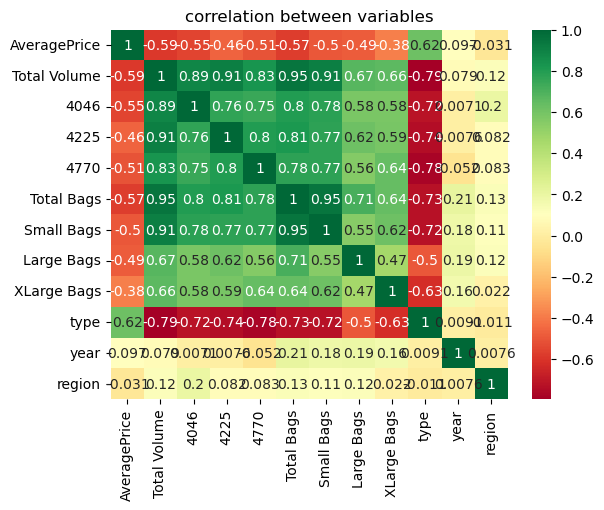

In [52]:
sns.heatmap(df.corr(),cmap='RdYlGn',annot = True)
plt.title('correlation between variables')
plt.show()

In [53]:
# checking correlation of every feature with target variable.
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.200752
Total Bags      0.130593
Large Bags      0.123820
Total Volume    0.123788
Small Bags      0.114967
4770            0.082727
4225            0.082283
XLarge Bags     0.021915
year            0.007607
type           -0.010840
AveragePrice   -0.030929
Name: region, dtype: float64

# Seperating Feature and Label

In [54]:
x = df.drop(['region'],axis=1)
y = df['region']

Here we are taking region as output variable and try to prediction using classification method.

# Feature scaling using Standard Scalarization

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:

scale = StandardScaler()
ax = pd.DataFrame(scale.fit_transform(x),columns = x.columns)
ax

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.160223,-0.132498,-0.627426,0.358001,-0.301792,-0.545622,-0.323997,-0.685274,-0.65511,-0.977488,-1.229571
1,-0.108470,-0.201626,-0.755501,0.286887,-0.256387,-0.505088,-0.286465,-0.673786,-0.65511,-0.977488,-1.229571
2,-1.195284,0.135261,-0.706588,0.606781,-0.064200,-0.575490,-0.352330,-0.659223,-0.65511,-0.977488,-1.229571
3,-0.807136,-0.041731,-0.601248,0.457809,-0.204408,-0.729421,-0.498536,-0.591931,-0.65511,-0.977488,-1.229571
4,-0.289605,-0.233447,-0.656127,0.280414,-0.194128,-0.701077,-0.476294,-0.490571,-0.65511,-0.977488,-1.229571
...,...,...,...,...,...,...,...,...,...,...,...
17829,0.616073,-0.714102,-0.424795,-0.919991,-1.242353,-0.345200,-0.148524,-0.287293,-0.65511,1.023031,1.960909
17830,0.823085,-0.804778,-0.585942,-0.630943,-1.242353,-0.516782,-0.307891,-0.361464,-0.65511,1.023031,1.960909
17831,1.237109,-0.808628,-0.585887,-0.751034,0.349345,-0.510465,-0.288984,-0.888271,-0.65511,1.023031,1.960909
17832,1.392368,-0.737047,-0.511974,-0.681276,0.349036,-0.439784,-0.223906,-0.845601,-0.65511,1.023031,1.960909


After applying feature scaling, the values in each column have been transformed to have mean of approximately 0 and standard deviation of approximately 1.


# Modelling

In [66]:
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import GridSearchCV

In [63]:

models = [DecisionTreeClassifier(), KNeighborsClassifier()]

max_acc = 0
for st in range(40, 90):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=st, test_size=0.33)
    for model in models:
        model.fit(x_train, y_train)
        pred1 = model.predict(x_test)
        acc = accuracy_score(y_test, pred1)
#      
        if acc > max_acc:
            max_acc = acc
            final_state = st
            final_model = model

print()
print()
print('max accuracy score correspond to random state:', final_state, 'and max accuracy is:', max_acc, 'and model is:', final_model)




max accuracy score correspond to random state: 86 and max accuracy is: 0.8544002718314645 and model is: KNeighborsClassifier()


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33, random_state=86)

KN =KNeighborsClassifier()
param = {'n_neighbors':range(1,30)}
grid = GridSearchCV(KN,param)
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 1}

In [70]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
score = accuracy_score(y_test,pred)
print('Accuracy score:',score*100)

Accuracy score: 87.59768943255182


final score is 87%

# Predicted Model

In [71]:
a = np.array(y_test)
data = pd.DataFrame()
data['predicted'] = pred
data['original'] =a
data

,predicted,original
0,37,37
1,36,36
2,44,44
3,51,51
4,39,39
...,...,...
5881,39,39
5882,8,8
5883,28,28
5884,35,35


---------------------------------------------------------------------------

# Prediction With Average Price

In [113]:
data = pd.read_csv('avocado.csv')
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [115]:
# drop unnamed column
data.drop('Unnamed: 0', axis=1,inplace=True)

In [116]:
data.shape

(18249, 13)

In [117]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [118]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

<AxesSubplot:>

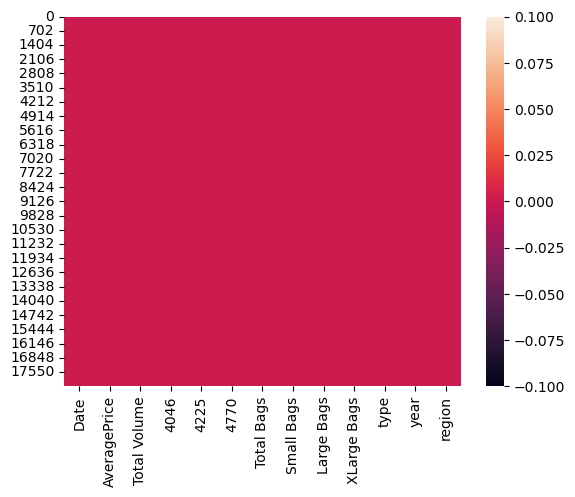

In [119]:
sns.heatmap(data.isnull())

<AxesSubplot:xlabel='AveragePrice', ylabel='count'>

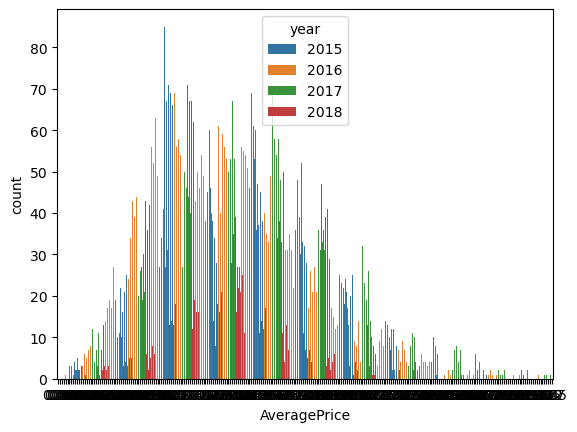

In [122]:
sns.countplot(x='AveragePrice',hue='year',data=data)

In [124]:
# checking the mean of price at each year of organic type of avocado
data.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [ ]:
# finding how much type of avocado is sell in last 4 year
data.groupby('year')['type'].value_counts()

In above,we can see 2017 year where avocado price is higher as compared to other year and 2015 is at secound number.

In [126]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


1.we can see there are multiple outliers in XLargeBags feature.
2.there is also much difference between mean and 50% (median) in some of columns.
3.difference between 75% and max value there are outliers in some columns.
4.mean and median value of most column are same and the std and mean are close to each other.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

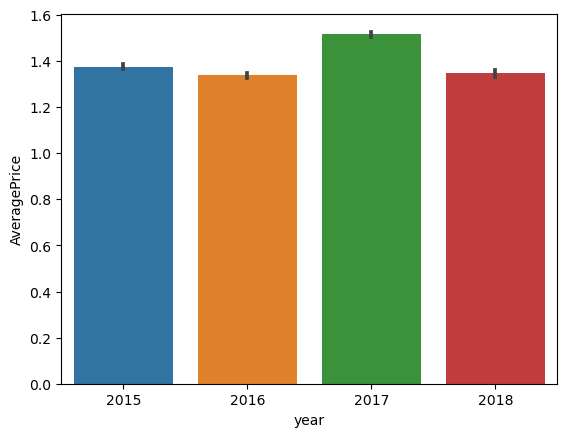

In [127]:
# checking ratio of year and price that which year had max price
sns.barplot(x='year',y='AveragePrice',data=data)

max average price is located in 2017 year.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

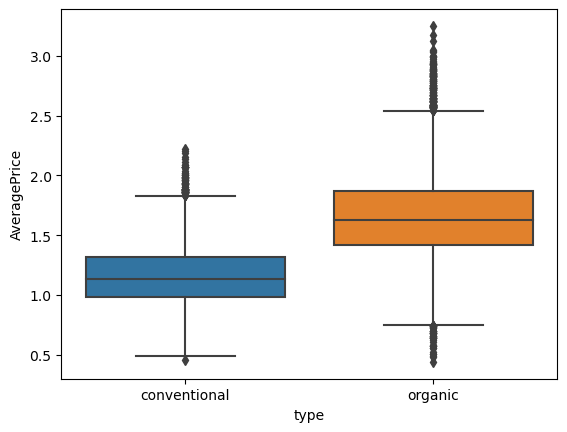

In [129]:
sns.boxplot(x='type',y='AveragePrice',data=data)

In [130]:
# convert "type" column, object data type to numeric
lab = LabelEncoder()
lab.fit(data['type'])
data.type =lab.transform(data.type)

In [132]:
data.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region           object
dtype: object

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

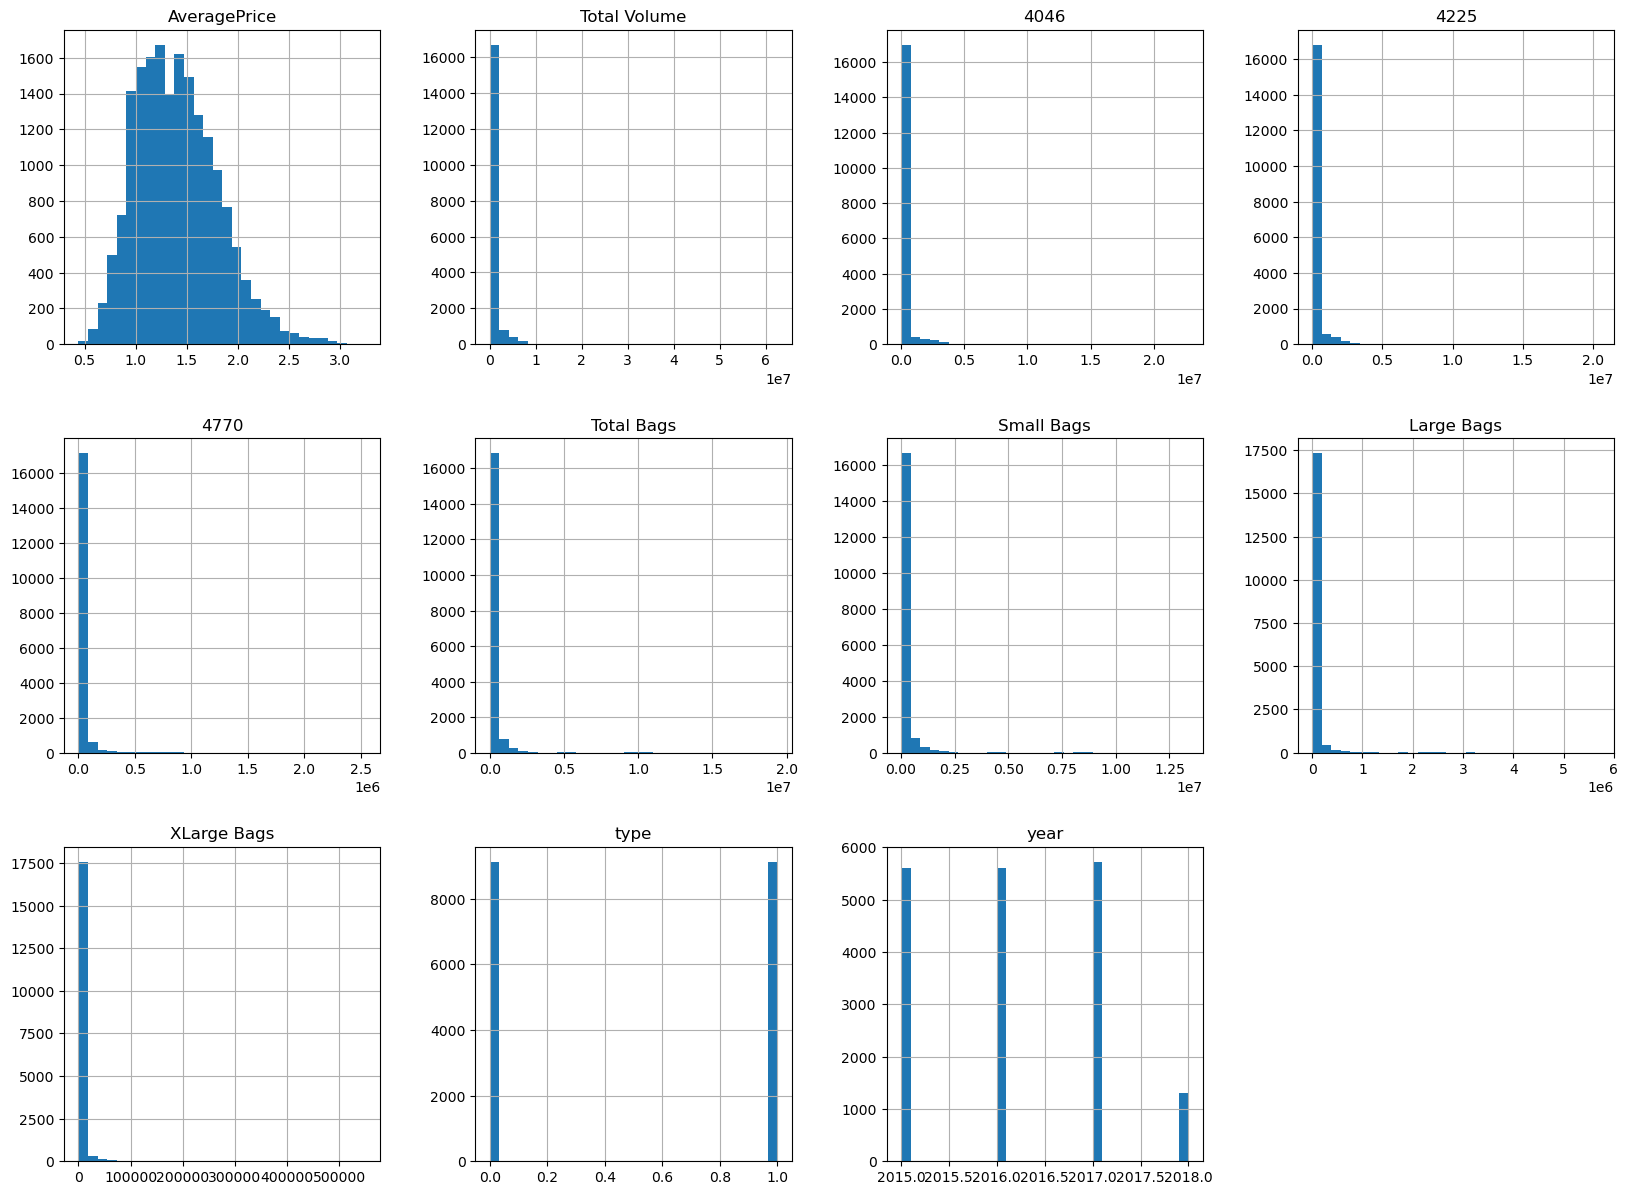

In [133]:
data.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

1.most data skewed to right side.
2.average price is normally distributed.

In [134]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

In [135]:
# making the skewness less than or equal to 0.5 for better predictionand plotting normal distribution
sk = ('Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', )
for col in sk:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

we using 'log1p' method to make the skew value near to zero.
now check for skewness again

In [136]:
data.skew()

AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
type            0.000329
year            0.215339
dtype: float64

AveragePrice       AxesSubplot(0.125,0.712609;0.133621x0.167391)
Total Volume    AxesSubplot(0.285345,0.712609;0.133621x0.167391)
4046             AxesSubplot(0.44569,0.712609;0.133621x0.167391)
4225            AxesSubplot(0.606034,0.712609;0.133621x0.167391)
4770            AxesSubplot(0.766379,0.712609;0.133621x0.167391)
Total Bags         AxesSubplot(0.125,0.511739;0.133621x0.167391)
Small Bags      AxesSubplot(0.285345,0.511739;0.133621x0.167391)
Large Bags       AxesSubplot(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     AxesSubplot(0.606034,0.511739;0.133621x0.167391)
type            AxesSubplot(0.766379,0.511739;0.133621x0.167391)
year                AxesSubplot(0.125,0.31087;0.133621x0.167391)
dtype: object

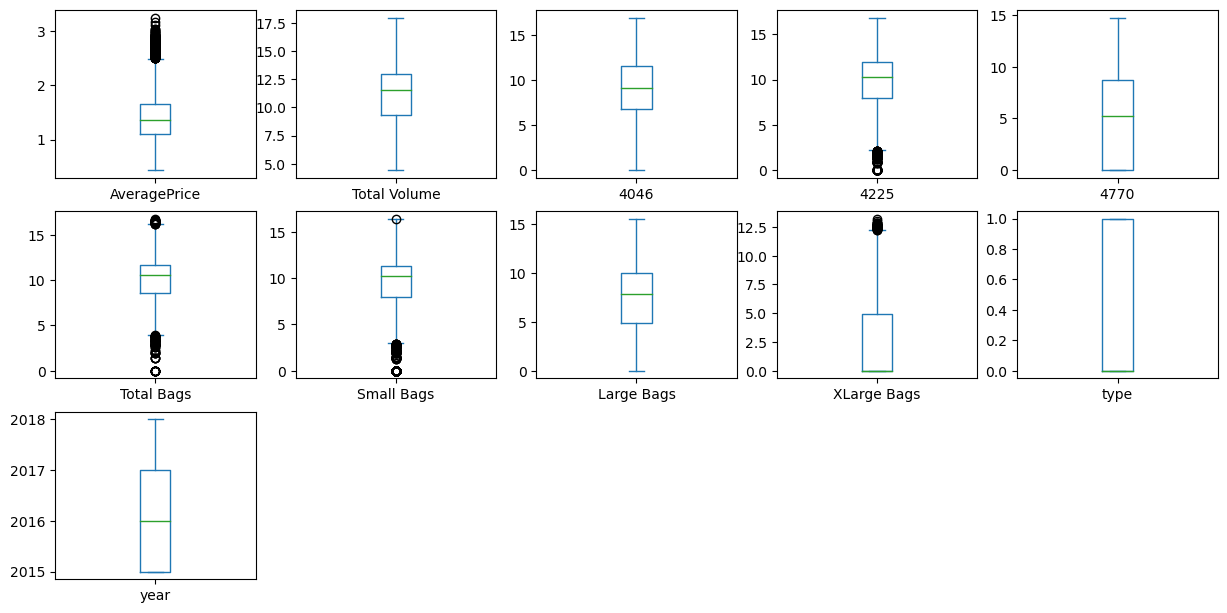

In [137]:
data.plot(kind='box',subplots =True,layout=(4,5),figsize=(15,10))

we can see the ,some columns having outliers.
now we have to remove the outliers using zscore values.

In [139]:
data.drop('Date',axis=1,inplace=True)

In [144]:
lab.fit(data['region'])
data.region = lab.transform(data.region)

In [145]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [147]:
# calculate zscore
z=np.abs(zscore(data))
print(z.head())

   AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0      0.188689      0.107282  0.609752  0.374936  0.279143    0.494074   
1      0.139020      0.175949  0.737707  0.305200  0.233838    0.454761   
2      1.182069      0.158690  0.688840  0.618892  0.042078    0.523041   
3      0.809551      0.017121  0.583598  0.472808  0.181974    0.672335   
4      0.312861      0.207558  0.638425  0.298852  0.171717    0.644845   

   Small Bags  Large Bags  XLarge Bags      type      year    region  
0    0.247796    0.669747     0.645526  0.999836  1.221282  1.700252  
1    0.213093    0.658279     0.645526  0.999836  1.221282  1.700252  
2    0.273995    0.643743     0.645526  0.999836  1.221282  1.700252  
3    0.409182    0.576571     0.645526  0.999836  1.221282  1.700252  
4    0.388616    0.475393     0.645526  0.999836  1.221282  1.700252  


In [148]:
thresh =3
print(np.where(z<3))
print(data.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(18249, 12)
None


In [149]:
# Assign the value to data_new which are leass the threshold value and removing the outliers
data_new = data[(z<3).all(axis=1)]


In [150]:
print(data.shape)
print(data_new.shape)
data = data_new
print('After removing outliers',data.shape)

(18249, 12)
(17834, 12)
After removing outliers (17834, 12)


[]

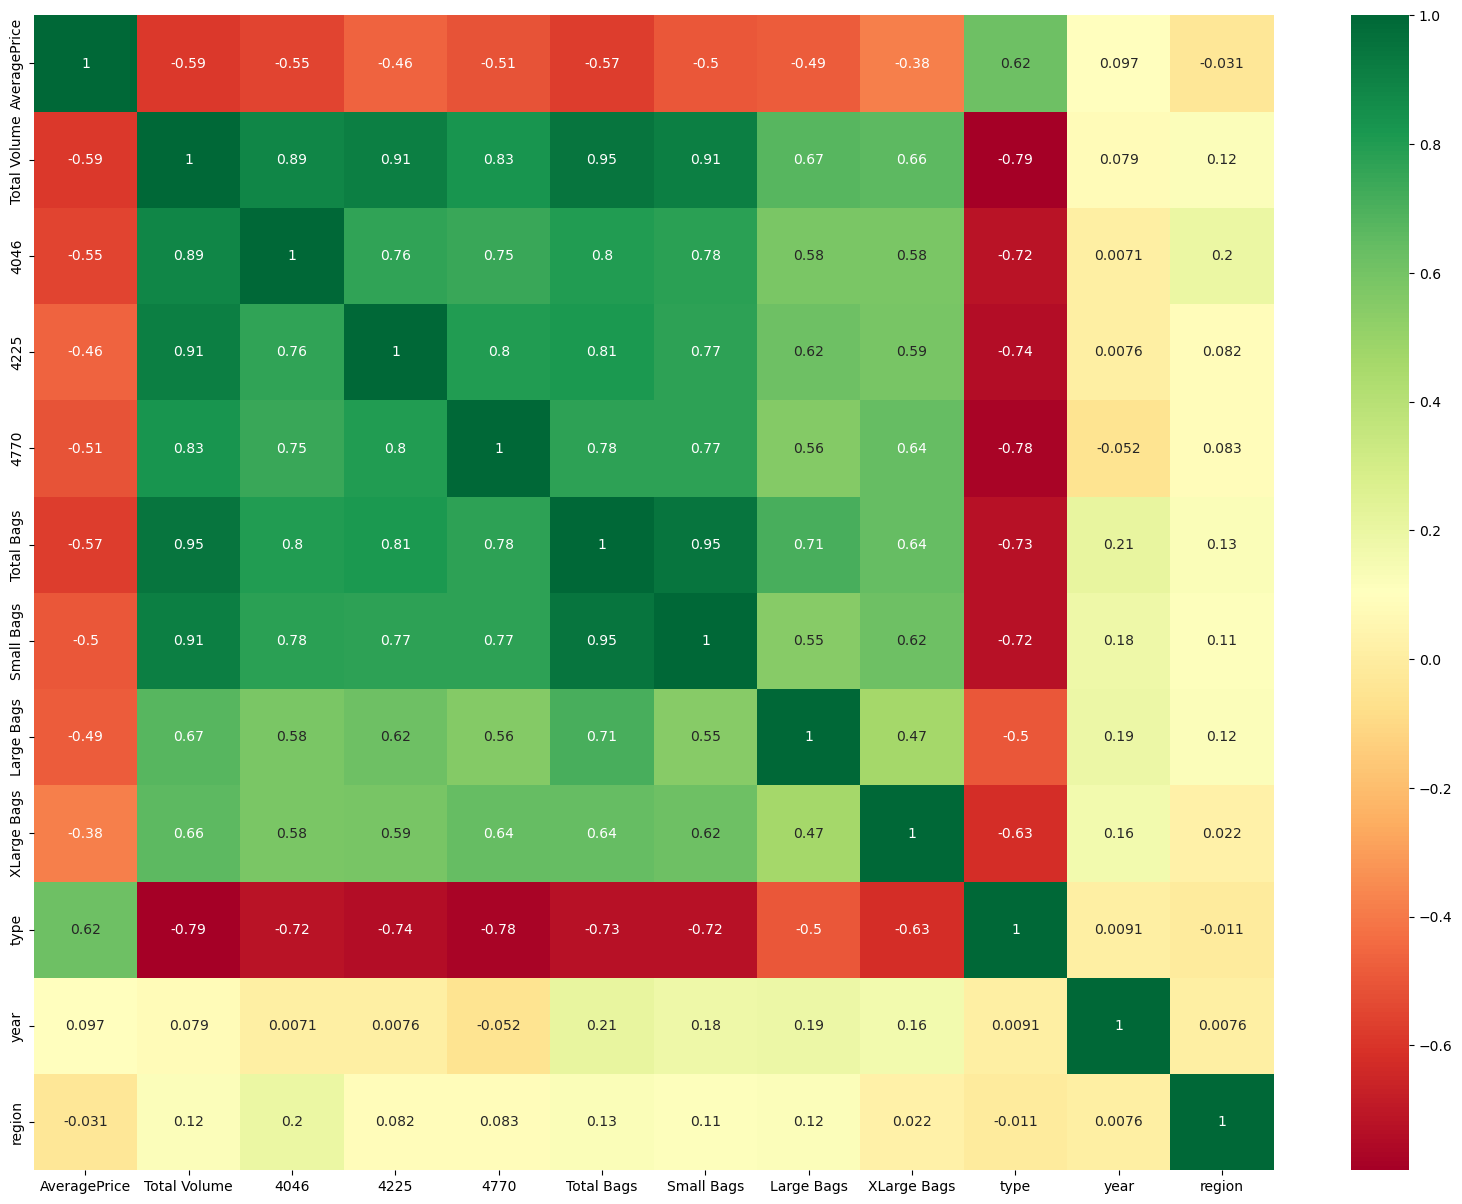

In [153]:
# Checking for correlation of all columns to each other
cor = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,cmap='RdYlGn',annot=True)
plt.plot()

# Seperating Features and label

In [154]:
x=data.drop(['AveragePrice'],axis=1)
y=data['AveragePrice']

Using multiple algo we are calculating best algorithm .

In [163]:
data.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

In [170]:


models = [DecisionTreeRegressor(), KNeighborsRegressor(), AdaBoostRegressor(), LinearRegression(), GradientBoostingRegressor()]

max_r2 = 0
for st in range(40, 90):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=st, test_size=0.33)
    for model in models:
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        r2 = r2_score(y_test, predictions)
#         print('r2 score correspond to random state:', st, 'is:', r2)
        if r2 > max_r2:
            max_r2 = r2
            final_state = st
            final_model = model

print()
print()
print('max r2 score correspond to random state:', final_state, 'is:', max_r2, 'and model is:', final_model)




max r2 score correspond to random state: 46 is: 0.8307893702546577 and model is: KNeighborsRegressor()


In [171]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

81.38505729844547


In [172]:
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('np.sqrt(mean_absolute_error:',np.sqrt(mean_absolute_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))


mean_absolute_error: 0.11425756031260619
mean_squared_error: 0.027481787291879032
np.sqrt(mean_absolute_error: 0.33802005903881827
r2_score: 0.8138505729844547


Text(0, 0.5, 'predicted_y')

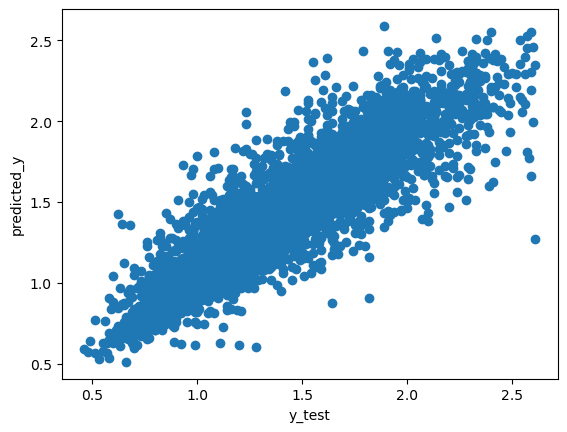

In [174]:
# checking difference between actual and predicted value using graph
plt.scatter(x = y_test,y=pred)
plt.xlabel('y_test')
plt.ylabel('predicted_y')

Scatter plot showing difference between actual value and predicted value,as we can see above, data point are close to best fit line.
It means there are very less error in data.

=================================================================================